In [ ]:
!pip install -U scikit-fuzzy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 993 kB 4.5 MB/s 
  Created wheel for scikit-fuzzy: filename=scikit_fuzzy-0.4.2-py3-none-any.whl size=894089 sha256=4313708a79f1f8b639e35e14a7a1b2d691729628cb38ce4f2bcda91c043b33ab
  Stored in directory: /root/.cache/pip/wheels/d5/74/fc/38588a3d2e3f34f74588e6daa3aa5b0a322bd6f9420a707131
Successfully built scikit-fuzzy


In [ ]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl
import matplotlib.pyplot as plt

In [ ]:
# tao tin hieu vao ra
food = ctrl.Antecedent(np.arange(0,11,1),'food')
service = ctrl.Antecedent(np.arange(0,11,1),'service')
tip = ctrl.Consequent(np.arange(10,26,1),'tip')

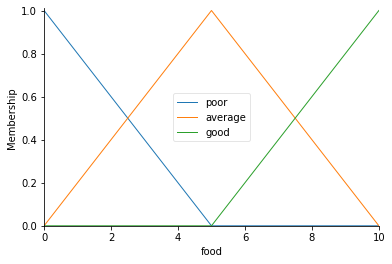

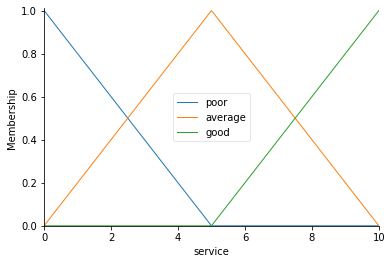

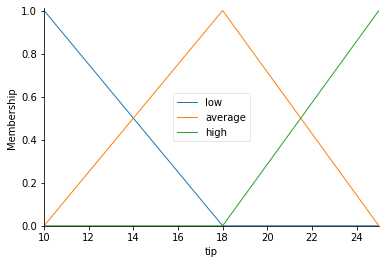

In [ ]:
#tao membership finction tu dong
#food.automf(5)
#food.view()
#tao membershipfunction bang tay
food['poor'] = fuzz.trimf(food.universe,[0,0,5])
food['average'] = fuzz.trimf(food.universe,[0,5,10])
food['good'] = fuzz.trimf(food.universe,[5,10,10])
food.view()
service['poor'] = fuzz.trimf(service.universe,[0,0,5])
service['average'] = fuzz.trimf(service.universe,[0,5,10])
service['good'] = fuzz.trimf(service.universe,[5,10,10])
service.view()
tip['low'] = fuzz.trimf(tip.universe,[10,10,18])
tip['average'] = fuzz.trimf(tip.universe,[10,18,25])
tip['high'] = fuzz.trimf(tip.universe,[18,25,25])
tip.view()

In [ ]:
rule1 = ctrl.Rule(food['poor'] & service['poor'], tip['low'])
rule2 = ctrl.Rule(food['poor'] & service['average'], tip['low'])
rule3 = ctrl.Rule(food['poor'] & service['good'], tip['average'])
rule4 = ctrl.Rule(food['average'] & service['poor'], tip['low'])
rule5 = ctrl.Rule(food['average'] & service['average'], tip['average'])
rule6 = ctrl.Rule(food['average'] & service['good'], tip['average'])
rule7 = ctrl.Rule(food['good'] & service['average'], tip['high'])
rule8 = ctrl.Rule(food['good'] & service['poor'], tip['high'])
rule9 = ctrl.Rule(food['good'] & service['good'], tip['high'])

17.941479260369814


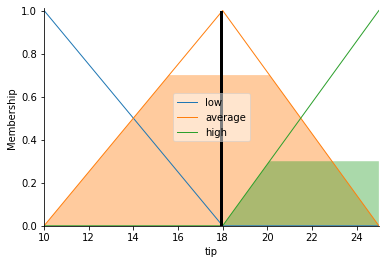

In [ ]:
tipping_ctrl = ctrl.ControlSystem([rule1, rule2,rule3, rule4, rule5,rule6, rule7, rule8,rule9, rule2])
tipping = ctrl.ControlSystemSimulation(tipping_ctrl)
tipping.input['food'] = 6.5
tipping.input['service'] = 9.8
tipping.compute()
print(tipping.output['tip'])
tip.view(sim = tipping)